# **SPAM DETECTION**

## Importing of Libraries

In [2]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

## Data Loading

In [3]:
# Loading Data

df = pd.read_csv('https://raw.githubusercontent.com/raja045/Machine-Learning/DatasetsUsedForProjects/mail_data.csv')
df.sample(10)

,Category,Message
4535,ham,I have no money 4 steve mate! !
3699,ham,S:)but he had some luck.2 catches put down:)
5554,ham,Well keep in mind I've only got enough gas for...
2280,ham,"Sorry, I'll call later in meeting"
2101,ham,Oh Howda gud gud.. Mathe en samachara chikku:-)
3608,ham,I have no idea where you are
575,ham,Nope i waiting in sch 4 daddy...
1319,ham,Ok...
3813,ham,Yep then is fine 7.30 or 8.30 for ice age.
524,ham,"That's very rude, you on campus?"


In [5]:
df.columns

Index(['Category', 'Message'], dtype='object')

In [6]:
df.shape #used to get the dimensions of a DataFrame.

(5572, 2)

## Data Cleaning

In [8]:
#Check and Delete Duplicates

df = df.drop_duplicates(keep='first')
df.sample(10)

,Category,Message
460,ham,Going thru a very different feeling.wavering d...
4149,spam,Please call Amanda with regard to renewing or ...
1305,ham,Your right! I'll make the appointment right now.
4337,ham,"Fyi I'm taking a quick shower, be at epsilon i..."
4265,ham,She just broke down a list of reasons why nobo...
3950,ham,HMM yeah if your not too grooved out! And im l...
522,ham,Shall i come to get pickle
1429,ham,"Tell you what, if you make a little spreadshee..."
5185,ham,I just cooked a rather nice salmon a la you
2889,ham,I take it we didn't have the phone callon Frid...


In [9]:
# Checking whether there is any null values in the table.

df.isnull().sum()


Category    0
Message     0
dtype: int64

In [10]:
# counting number of ham and spam in the dataset

counts = df['Category'].value_counts()
print(counts)


Category
ham     4516
spam     641
Name: count, dtype: int64


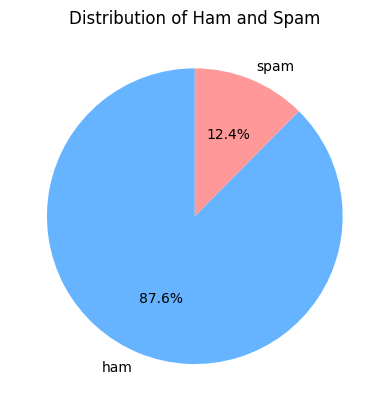

In [ ]:
# Plotting a pie chart based on the counts values.

counts.plot.pie(autopct='%1.1f%%', startangle=90, labels=counts.index, colors=['#66b3ff','#ff9999'])
plt.title('Distribution of Ham and Spam')
plt.ylabel('')  # Remove the y-label
plt.show()

## Converting Labels SPAM and HAM to Numerical Values

In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

# df['Category'] = le.fit_transform(df['Category'])
# You can also you this

le.fit(['spam','ham'])
df['Category'] = le.transform(df['Category'])

df.head()

,Category,Message
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


## **Data Analysis**

In [ ]:
import nltk
#NLTK (Natural Language Toolkit) is a popular Python library used for natural language processing (NLP).
#It provides tools and resources for tasks like tokenization, stemming, tagging, parsing, and more.

nltk.download('punkt')
#The Punkt tokenizer is designed to split text into sentences by detecting sentence boundaries based on punctuation marks and capitalization patterns.

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [ ]:
# Calculating Number of characters in the message
df['num_characters'] = df['Message'].apply(len)
df.head()

,Category,Message,num_characters
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61


In [ ]:
# Calculating Number of words in the each message.
df['num_words'] = df['Message'].apply(lambda x:len(nltk.word_tokenize(x)))
df.head()

,Category,Message,num_characters,num_words
0,0,"Go until jurong point, crazy.. Available only ...",111,24
1,0,Ok lar... Joking wif u oni...,29,8
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37
3,0,U dun say so early hor... U c already then say...,49,13
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15


In [ ]:
# Calculating Number of words in each message.
df['num_sentences'] = df['Message'].apply(lambda x:len(nltk.sent_tokenize(x)))
df.head()

,Category,Message,num_characters,num_words,num_sentences
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [ ]:
df[['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,5157.000000,5157.000000,5157.000000
mean,79.103936,18.560403,1.969750
std,58.382922,13.405970,1.455526
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,61.000000,15.000000,1.000000
75%,118.000000,26.000000,2.000000
max,910.000000,220.000000,38.000000


In [ ]:
df[df['Category']==0][['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,4516.000000,4516.000000,4516.000000
mean,70.869353,17.267715,1.827724
std,56.708301,13.588065,1.394338
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,53.000000,13.000000,1.000000
75%,91.000000,22.000000,2.000000
max,910.000000,220.000000,38.000000


In [ ]:
df[df['Category']==1][['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,641.000000,641.000000,641.000000
mean,137.118565,27.667707,2.970359
std,30.399707,7.103501,1.485575
min,7.000000,2.000000,1.000000
25%,130.000000,25.000000,2.000000
50%,148.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,223.000000,46.000000,9.000000


In [ ]:
import seaborn as sns

<Axes: xlabel='num_characters', ylabel='Count'>

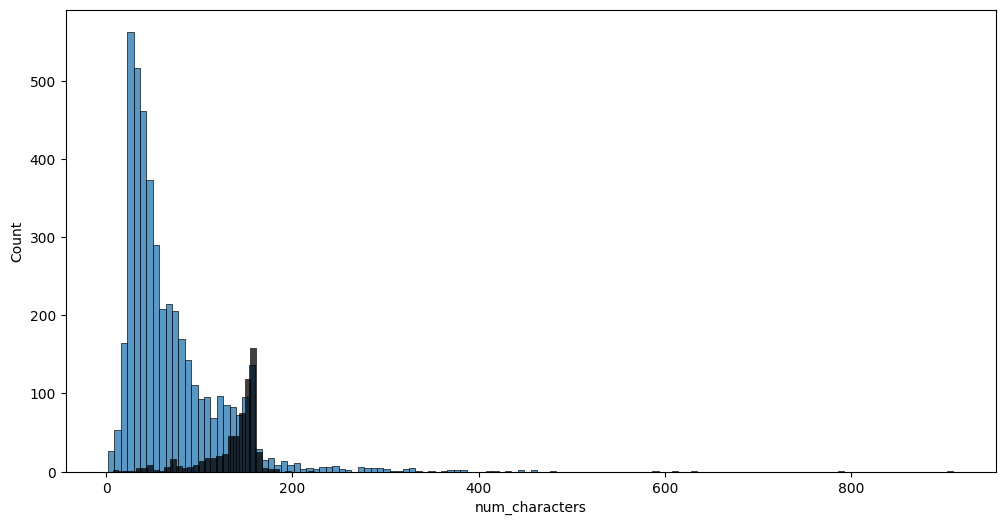

In [ ]:
plt.figure(figsize=(12,6)) #This is optional, But this size of graph gives you clear image.
sns.histplot(df[df['Category']==0]['num_characters'])
sns.histplot(df[df['Category']==1]['num_characters'],color='black')

<Axes: xlabel='num_words', ylabel='Count'>

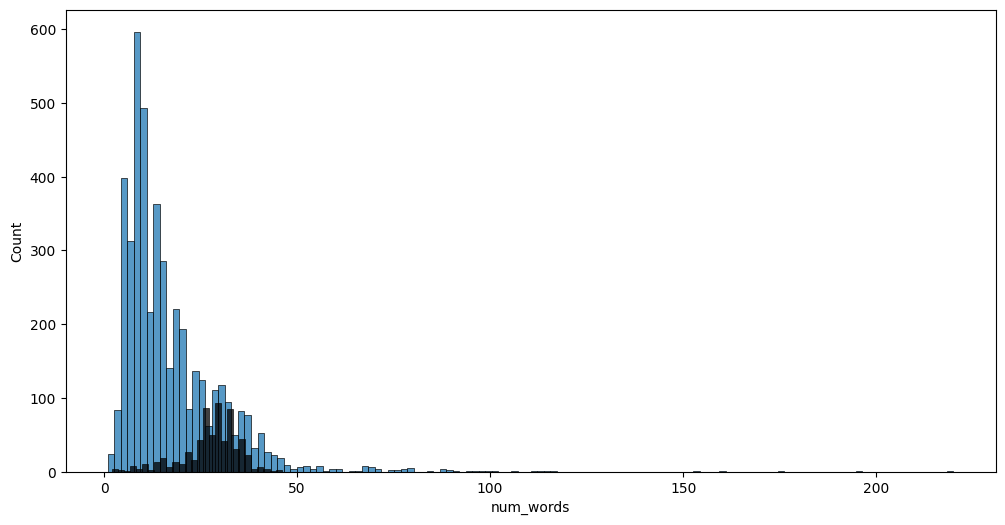

In [ ]:
plt.figure(figsize=(12,6))
sns.histplot(df[df['Category']==0]['num_words'])
sns.histplot(df[df['Category']==1]['num_words'],color='black')

<Axes: xlabel='num_sentences', ylabel='Count'>

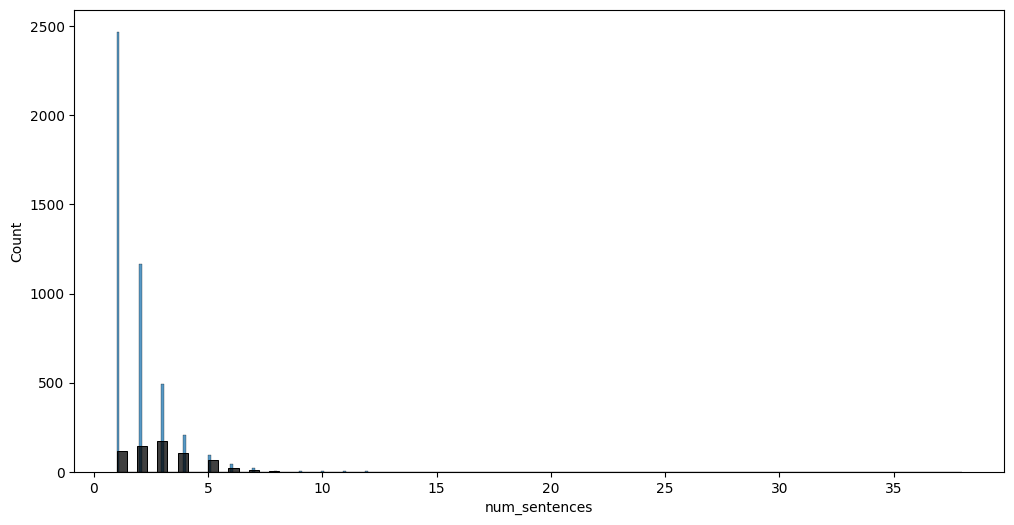

In [ ]:
plt.figure(figsize=(12,6))
sns.histplot(df[df['Category']==0]['num_sentences'])
sns.histplot(df[df['Category']==1]['num_sentences'],color='black')

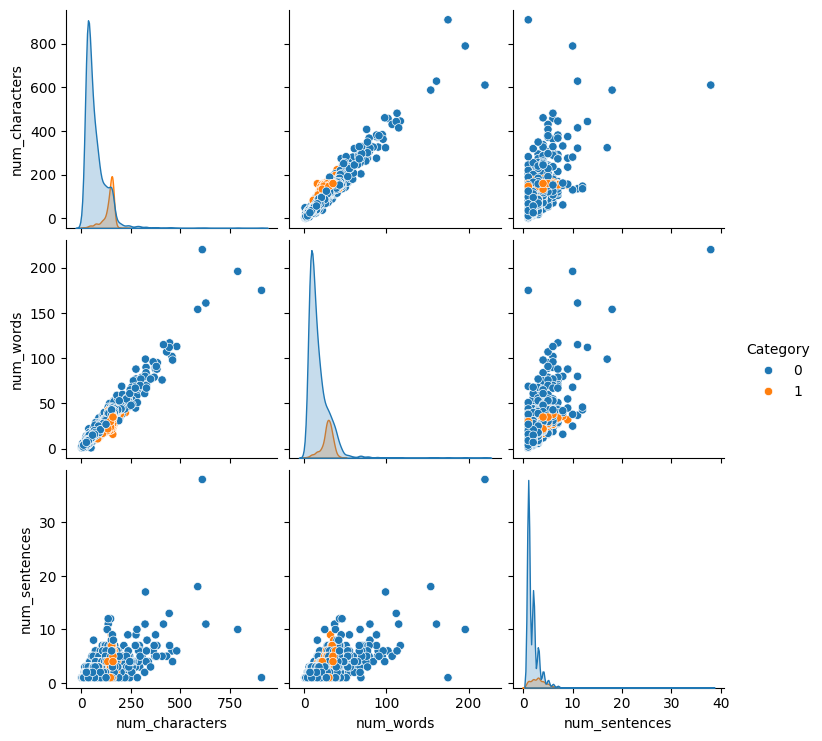

In [ ]:
sns.pairplot(df,hue='Category')

## **Data PreProcessing**

These are the five data preprocessing steps, we are going to do below.
1. make all characters lower case

2. tokenize

3. remove special characters

4. removing stop words

5. stemming

In [ ]:
'''
import pandas as pd
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer
import string

#Step 1: LowerCase
#df['Message'] = df['Message'].apply(lambda x: x.lower())

# Step 2: Tokenize
df['Tokens'] = df['Message'].apply(word_tokenize)
#print(df.head())

# Step 3: Remove special characters
def remove_special_characters(tokens):
    return [token for token in tokens if token not in string.punctuation]

df['Tokens'] = df['Tokens'].apply(remove_special_characters)

print(df.sample())

# Step 4: Remove stop words
stop_words = set(stopwords.words('english'))
def remove_stop_words(tokens):
    return [token for token in tokens if token.lower() not in stop_words]

df['Tokens'] = df['Tokens'].apply(remove_stop_words)



# Step 5: Stemming
stemmer = PorterStemmer()
def stem(tokens):
    return [stemmer.stem(token) for token in tokens]

df['Tokens'] = df['Tokens'].apply(stem)

# Display the preprocessed data
#print(df.head())
'''

"\nimport pandas as pd\nimport nltk\nnltk.download('stopwords')\nfrom nltk.corpus import stopwords\nfrom nltk.tokenize import word_tokenize\nfrom nltk.stem import PorterStemmer\nimport string\n\n#Step 1: LowerCase\n#df['Message'] = df['Message'].apply(lambda x: x.lower())\n\n# Step 2: Tokenize\ndf['Tokens'] = df['Message'].apply(word_tokenize)\n#print(df.head())\n\n# Step 3: Remove special characters\ndef remove_special_characters(tokens):\n    return [token for token in tokens if token not in string.punctuation]\n\ndf['Tokens'] = df['Tokens'].apply(remove_special_characters)\n\nprint(df.sample())\n\n# Step 4: Remove stop words\nstop_words = set(stopwords.words('english'))\ndef remove_stop_words(tokens):\n    return [token for token in tokens if token.lower() not in stop_words]\n\ndf['Tokens'] = df['Tokens'].apply(remove_stop_words)\n\n\n\n# Step 5: Stemming\nstemmer = PorterStemmer()\ndef stem(tokens):\n    return [stemmer.stem(token) for token in tokens]\n\ndf['Tokens'] = df['Tokens'

In [ ]:
from nltk.corpus import stopwords
nltk.download('stopwords')
import string
from nltk.stem.porter  import PorterStemmer
ps = PorterStemmer()

def transform_text(Message):
    Message=Message.lower()
    Message=nltk.word_tokenize(Message)

    y=[]
    for i in Message:
        if i.isalnum():
            y.append(i)

    Message=y[:]
    y.clear()

    for i in Message:
        if i not in stopwords.words('english') and i not in string.punctuation:
            y.append(i)


    Message=y[:]
    y.clear()
    for i in Message:
         y.append(ps.stem(i))


    return " ".join(y)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
df['transformed_text']=df['Message'].apply(transform_text)

In [ ]:
df.head()

,Category,Message,num_characters,num_words,num_sentences,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [ ]:
#pip install wordcloud

In [ ]:
from wordcloud import WordCloud
wc = WordCloud(width=1000, height=1000, min_font_size=10, background_color='white')

# Generate the WordCloud for spam words
spam_wordcloud = wc.generate(df[df['Category']==1]['transformed_text'].str.cat(sep=""))


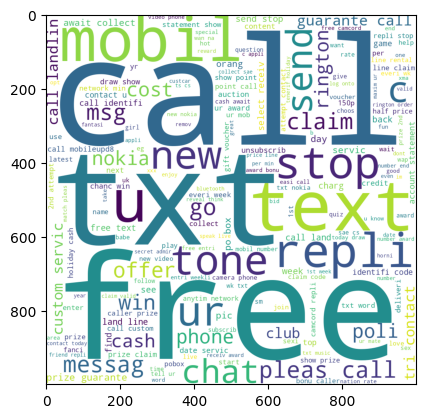

In [ ]:
plt.imshow(spam_wordcloud)

In [ ]:
ham_wordcloud = wc.generate(df[df['Category']==0]['transformed_text'].str.cat(sep=" "))

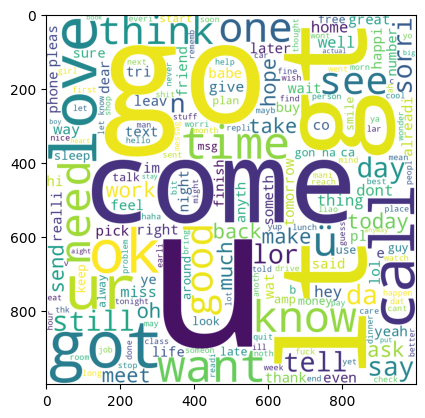

In [ ]:
plt.imshow(ham_wordcloud)

In [ ]:
df.sample(10)

,Category,Message,num_characters,num_words,num_sentences,transformed_text
898,0,I'm used to it. I just hope my agents don't dr...,154,39,3,use hope agent drop sinc book thing year whole...
674,0,Ditto. And you won't have to worry about me sa...,153,37,4,ditto wo worri say anyth anymor like said last...
2932,0,Hi' Test on &lt;#&gt; rd ....,30,13,1,hi test lt gt rd
2377,0,I'm on my way home. Went to change batt 4 my w...,74,21,2,way home went chang batt 4 watch go shop bit lor
3273,0,"MOON has come to color your dreams, STARS to m...",121,26,2,moon come color dream star make music sm give ...
2530,0,Can you just come in for a sec? There's somebo...,71,18,2,come sec somebodi want see
3204,0,Haha... Yup hopefully we will lose a few kg b...,97,22,2,haha yup hope lose kg mon hip hop go orchard w...
5229,0,It means u could not keep ur words.,35,9,1,mean u could keep ur word
3249,0,Also track down any lighters you can find,41,8,1,also track lighter find
4274,0,Kind of. Just missed train cos of asthma attac...,106,26,3,kind miss train co asthma attack nxt one half ...


In [ ]:
df.to_csv('final.csv')

## **Training the model**

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
cv = CountVectorizer()
tfidf = TfidfVectorizer(max_features=3000)

In [ ]:
X = tfidf.fit_transform(df['transformed_text']).toarray()

In [ ]:
X.shape

(5157, 3000)

In [ ]:
y = df['Category'].values

In [ ]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)

In [ ]:
lr = LogisticRegression()
lr.fit(X_train, y_train)

LogisticRegression()

In [ ]:
y_pred = lr.predict(X_test)

## Evaluating the Model Performance

In [ ]:
ac = accuracy_score(y_test, y_pred)
ac

0.9593023255813954